# BIKE SHARING DEMAND PREDICTION BY MULTIPLE LINEAR REGRESSION





## Step 1: Understanding the Problem Statement

A US bike-sharing provider, "BoomBikes" has suffered a loss in their revenues due to the Corona pandemic. A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.


**Business Objective:-**
- The main goal of this assignment is to help the company to understand the factors on which the demand for these shared bikes depends. The company wants to know:
    1. Which variables are significant in predicting the demand for shared bikes.
    2. How well those variables describe the bike demands
- To achieve this, we are required to model the demand for shared bikes with the available independent variables. It will be used by the management to manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
- Further, the model will be a good way for management to understand the demand dynamics of a new market.    

## Step 2: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries

from sklearn import preprocessing
from IPython.core.interactiveshell import InteractiveShell
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
# Reading the data

bike_df = pd.read_csv("day.csv", parse_dates=['dteday'])

In [4]:
# Checking the top 5 rows of datafrae

bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Describing the columns of dataframe

bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Checking the type of columns

bike_df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [7]:
# Checking shape of dataframe

bike_df.shape

(730, 16)

In [8]:
# Checking the descriptive information of columns

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [9]:
print('Total numbers of rows in dataset are: ', bike_df.shape[0])
print('Total numbers of features in dataset are: ', bike_df.shape[1])

Total numbers of rows in dataset are:  730
Total numbers of features in dataset are:  16


In [10]:
# Missing value check column wise

bike_df.isnull().sum().sort_values(ascending=False)

cnt           0
registered    0
casual        0
windspeed     0
hum           0
atemp         0
temp          0
weathersit    0
workingday    0
weekday       0
holiday       0
mnth          0
yr            0
season        0
dteday        0
instant       0
dtype: int64

In [11]:
# Missing value check row wise 

round(bike_df.isnull().sum(axis = 1).value_counts(normalize = True)*100,2)

0    100.0
dtype: float64

## Step 3: Data Cleaning and Visualization

In [12]:
# Deriving new metric "week_no" from dteday(date type) column

bike_df['week_no'] = bike_df['dteday'].dt.day.apply(lambda x: str((x-1)//7 +1))

In [13]:
# Dropping the unwanted columns
# instant has only index for the row, dteday has date which is compensated by year, month and weekday column,
# casual and registered seems to be the breakup by category for cnt column.

bike_df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [14]:
# Checking the columns of dataframe

bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'week_no'],
      dtype='object')

In [15]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,week_no
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1


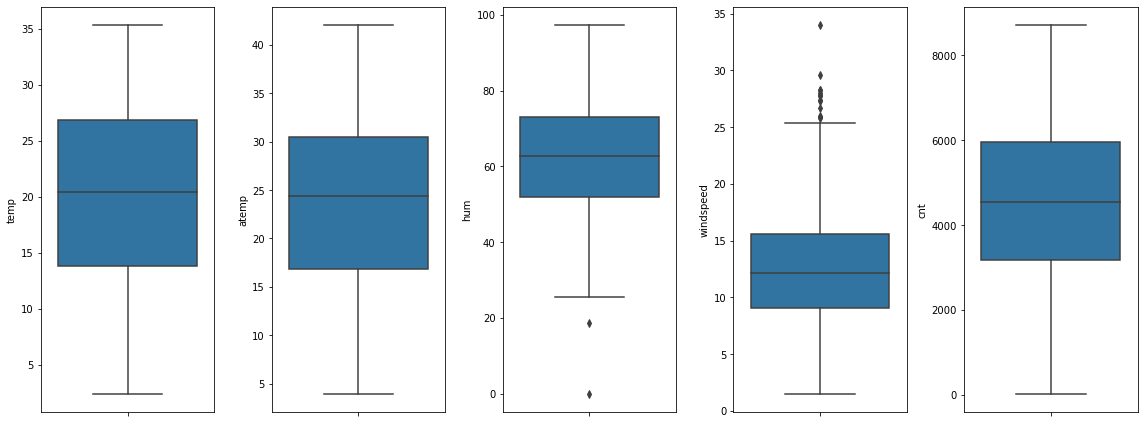

In [16]:
# Identification of outliers for quantitative variables (Univariate Analysis)

names = bike_df[['temp', 'atemp','hum','windspeed','cnt']]

ncols = len(names)
fig, axes = plt.subplots(1, 5, figsize=(16, 6))

for name, ax in zip(names, axes.flatten()):
    sns.boxplot(y=name, data=bike_df, orient='v', ax=ax)
    
plt.tight_layout()

## Inferences:
>**There are few outliers in windspeed and hum variables**

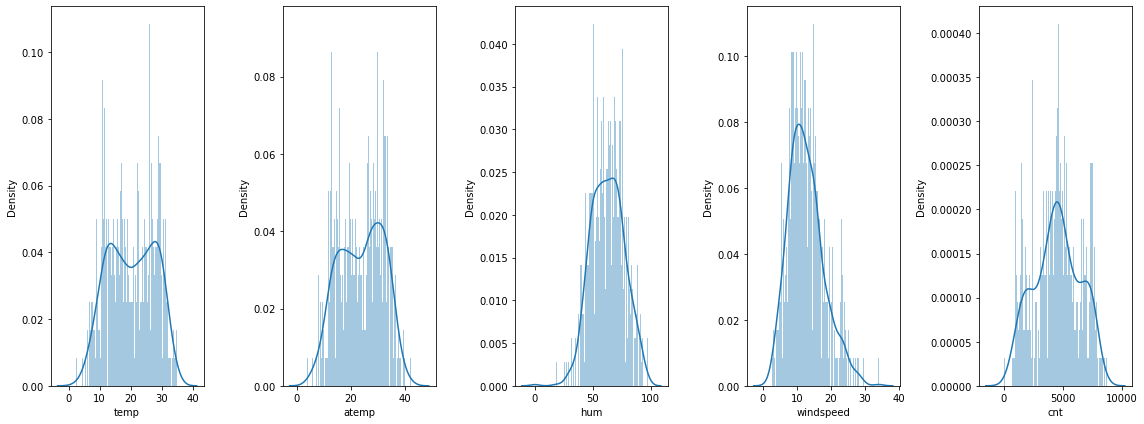

In [17]:
# Identification of distribution for quantitative variables (Univariate Analysis)

names = bike_df[['temp', 'atemp','hum','windspeed','cnt']]

ncols = len(names)
fig, axes = plt.subplots(1, 5, figsize=(16, 6))

for name, ax in zip(names, axes.flatten()):
    sns.distplot(bike_df[name], hist=True, bins=200, ax=ax)
    
plt.tight_layout()

## Inferences:
>**We are not sure about distributiion of quantitative feature variable, but it doesn't seem to be normal.**

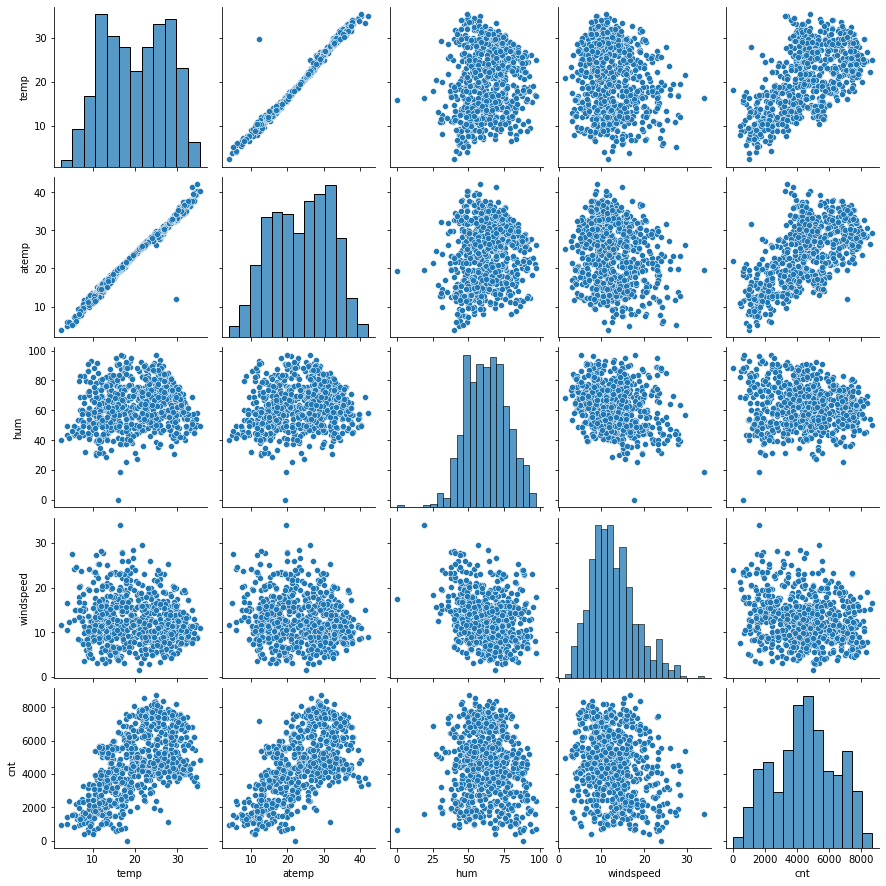

In [18]:
# Analysing/visualizing the numerical columns (multiple pairwise bivariate distributions)

sns.pairplot(data=bike_df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

## Inferences:
>**temp, atemp and cnt are highly correlated.**

In [19]:
# Encoding/mapping the categorical columns (for interpretation purpose)

bike_df['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)
bike_df['mnth'].replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}, inplace=True)
bike_df['weekday'].replace({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}, inplace=True)
bike_df['weathersit'].replace({1:'good',2:'moderate',3:'bad',4:'severe'}, inplace = True)

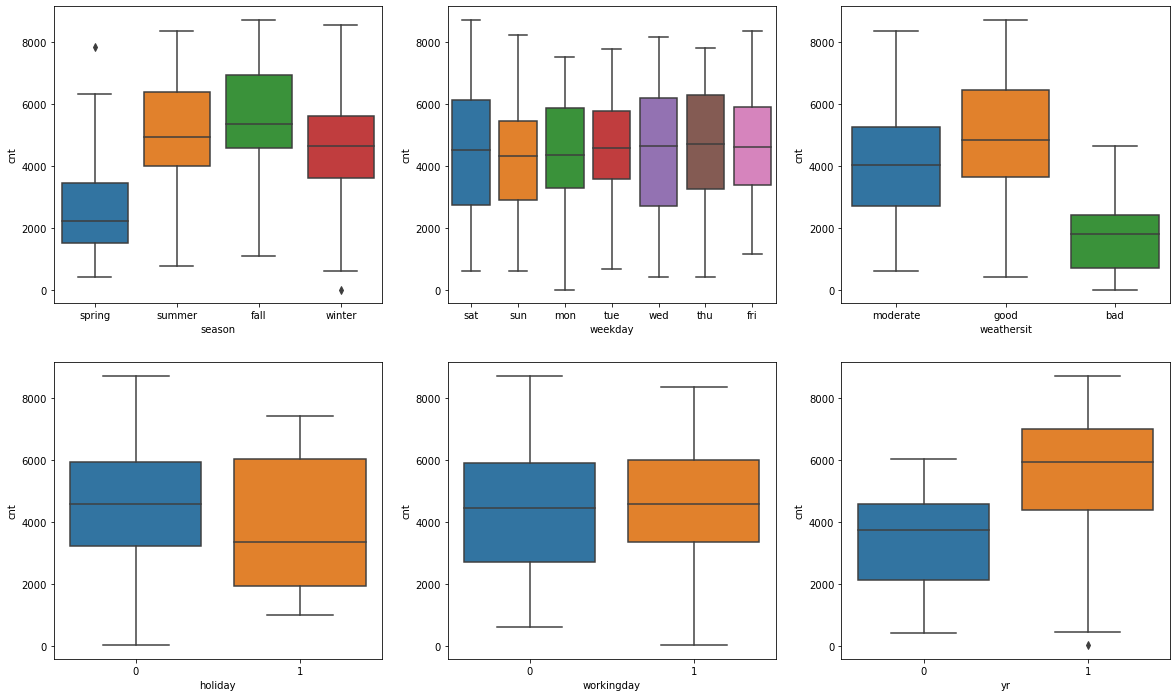

In [20]:
# Analysing/visualizing the categorical columns (bivariate analysis)
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.show()

## Inferences:
>**From above graphs, following points are observed:-**
- **season** seems to be a good factor, since it varies with target column 
- **weekday** doesn't seem to be a good factor, since there is much less variance with target column 
- **weathersit** seems to be a good factor, but no data is observed for weathersit_4 i.e. weathersit_severe label
- **holiday** seems to be a moderate factor
- **workingday** also seems to be a moderate factor
- **yr** seems to be a very good factor (especially year 2019), where 0 indicates 2018 and 1 indicates 2019 

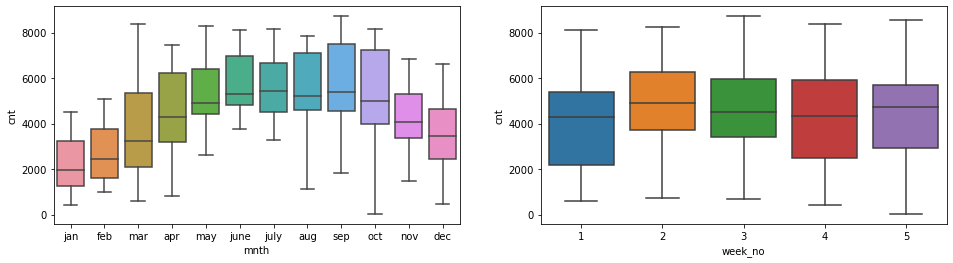

In [21]:
# Analysing/visualizing the categorical columns (bivariate analysis)
# to see how predictor variable stands against the target variable

plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(1,2,2)
sns.boxplot(x = 'week_no', y = 'cnt', data = bike_df)

plt.show()

## Inferences:
>**From above graphs, following points are observed:-**
-  **mnth** seems to be a very good factor, especially, apr to oct months
-  **week_no** doesn't seem to be a good factor

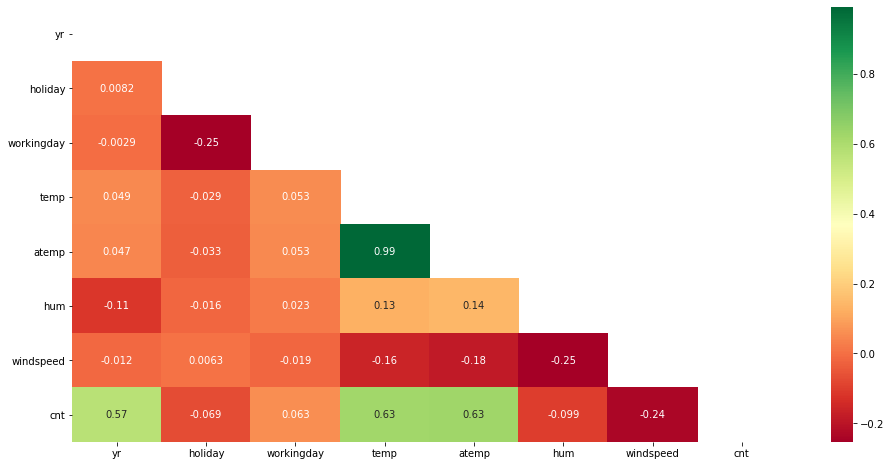

In [22]:
# Checking the correlations (multivariate analysis)

plt.figure(figsize = (16,8))
matrix = np.triu(bike_df.corr())
sns.heatmap(bike_df.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

## Inference:
>**temp and atemp are observed to have a very high correlation**

In [23]:
# Dropping atemp variable due to high correlation with temp variable

bike_df.drop(['atemp'], axis = 1, inplace = True)

## Step 4: Data Preparation

In [24]:
# Converting to 'category' data type

bike_df['season']=bike_df['season'].astype('category')
bike_df['weathersit']=bike_df['weathersit'].astype('category')
bike_df['mnth']=bike_df['mnth'].astype('category')
bike_df['weekday']=bike_df['weekday'].astype('category')
bike_df['week_no']=bike_df['week_no'].astype('category')
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
 11  week_no     730 non-null    category
dtypes: category(5), float64(3), int64(4)
memory usage: 44.9 KB


In [25]:
# Creating One-Hot Encoding of categorical variables

bike_df = pd.get_dummies(bike_df)
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'mnth_apr', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july',
       'mnth_june', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_fri', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate', 'week_no_1', 'week_no_2',
       'week_no_3', 'week_no_4', 'week_no_5'],
      dtype='object')

In [26]:
# Dropping one level of categorical variables to reduce multicollinearity

bike_df = bike_df.drop(['season_spring','mnth_jan','weekday_sun', 'week_no_1'], axis = 1)

In [27]:
# Checking the new shape of dataframe

bike_df.shape

(730, 34)

In [28]:
# Checking the descriptive information of new columns of dataframe

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   hum                  730 non-null    float64
 5   windspeed            730 non-null    float64
 6   cnt                  730 non-null    int64  
 7   season_fall          730 non-null    uint8  
 8   season_summer        730 non-null    uint8  
 9   season_winter        730 non-null    uint8  
 10  mnth_apr             730 non-null    uint8  
 11  mnth_aug             730 non-null    uint8  
 12  mnth_dec             730 non-null    uint8  
 13  mnth_feb             730 non-null    uint8  
 14  mnth_july            730 non-null    uint8  
 15  mnth_june            730 non-null    uin

## Step 5: Splitting the Data into Training and Testing Sets

In [29]:
# Importing train_test_split

from sklearn.model_selection import train_test_split

In [30]:
# Splitting the dataset into trainset and test in 70:30 ratio
# We specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_df, test_size = 0.3, random_state = 333)

In [31]:
# Applying scaling to all the numeric columns 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['temp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

>**We are using MinMaxScaler here, since, there are some outliers in few feature variables and we are not sure about the distribution as well for all the features.**

In [32]:
# Creating target and feature variable for trainset

y_train = df_train.pop('cnt')
X_train = df_train

In [33]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
# Running RFE (Recursive Feature Elimination) with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15) # running RFE
rfe = rfe.fit(X_train, y_train)

In [35]:
# Checking the support and ranking of each column

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 19),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_fall', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_apr', False, 3),
 ('mnth_aug', False, 10),
 ('mnth_dec', False, 7),
 ('mnth_feb', False, 12),
 ('mnth_july', False, 11),
 ('mnth_june', False, 4),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 2),
 ('mnth_nov', False, 6),
 ('mnth_oct', True, 1),
 ('mnth_sep', True, 1),
 ('weekday_fri', False, 16),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 18),
 ('weekday_wed', False, 15),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1),
 ('week_no_2', False, 8),
 ('week_no_3', False, 5),
 ('week_no_4', False, 13),
 ('week_no_5', False, 14)]

In [36]:
# Columns present for further modelling process

col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_fall',
       'season_summer', 'season_winter', 'mnth_mar', 'mnth_oct', 'mnth_sep',
       'weekday_sat', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [37]:
# Columns which seem to be insignificant and removed after rfe

X_train.columns[~rfe.support_]

Index(['holiday', 'mnth_apr', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_july',
       'mnth_june', 'mnth_may', 'mnth_nov', 'weekday_fri', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'week_no_2', 'week_no_3',
       'week_no_4', 'week_no_5'],
      dtype='object')

## Step 6: Building a linear model

In [38]:
import statsmodels.api as sm

# Import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [39]:
# Common function for building model and getting summary

def build_model(df):
    # Add a constant
    X_train_lm = sm.add_constant(df)

    # Create a first fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()

    # Print a summary of the linear regression model obtained
    print(lr.summary())
    

In [40]:
# Common function for getting VIF(Variaton Inflation Factor) values of all columns

def get_VIFS(df):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


### Initial Model with all columns

In [41]:
build_model(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     87.88
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.23e-176
Time:                        17:57:39   Log-Likelihood:                 525.17
No. Observations:                 511   AIC:                            -986.3
Df Residuals:                     479   BIC:                            -850.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0638    

## Inference:
>**Initially, before any tuning, R-squared is 0.850 and Adj. R-squared is 0.841**

### Model-1

In [42]:
# Creating new dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [43]:
build_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     188.4
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.58e-188
Time:                        17:57:39   Log-Likelihood:                 510.65
No. Observations:                 511   AIC:                            -991.3
Df Residuals:                     496   BIC:                            -927.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0675    

In [44]:
get_VIFS(X_train_rfe)

,Features,VIF
13,weathersit_good,34.54
14,weathersit_moderate,25.65
5,season_fall,5.15
2,temp,3.62
12,weathersit_bad,3.45
6,season_summer,2.65
7,season_winter,2.30
3,hum,1.94
1,workingday,1.63
11,weekday_sat,1.63


## Inference:
>**After RFE, number of columns reduced from 34 to 15, and still R-squared is 0.842, Adj. R-squared is 0.837, i.e. less variance and thus infact seems be good. After this coarse-tuning, we will perform fine-tuning and thus drop 1 feature at a time.**

### Model-2

##### From Model-1, p-values are already less and "weathersit_good" has very high VIF value, thus dropping it.

In [45]:
X_train_2 = X_train_rfe.drop(["weathersit_good"], axis = 1)

In [46]:
build_model(X_train_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     188.4
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.58e-188
Time:                        17:57:39   Log-Likelihood:                 510.65
No. Observations:                 511   AIC:                            -991.3
Df Residuals:                     496   BIC:                            -927.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1963    

In [47]:
get_VIFS(X_train_2)

,Features,VIF
2,temp,23.21
3,hum,17.28
5,season_fall,6.97
1,workingday,4.62
4,windspeed,4.56
6,season_summer,3.51
7,season_winter,2.99
13,weathersit_moderate,2.14
0,yr,2.03
11,weekday_sat,1.79


### Model-3

##### From Model-2, p-values are already less and "temp" has very high VIF value, but from business point of view, it seems important. The next variable with high VIF is "hum", thus next dropping "hum" .


In [48]:
X_train_3 = X_train_2.drop(["hum"], axis = 1)

In [49]:
build_model(X_train_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.7
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.69e-184
Time:                        17:57:40   Log-Likelihood:                 499.16
No. Observations:                 511   AIC:                            -970.3
Df Residuals:                     497   BIC:                            -911.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0917    

In [50]:
get_VIFS(X_train_3)

,Features,VIF
2,temp,16.79
4,season_fall,6.71
3,windspeed,4.28
1,workingday,4.12
5,season_summer,3.49
6,season_winter,2.88
0,yr,2.03
8,mnth_oct,1.66
10,weekday_sat,1.66
12,weathersit_moderate,1.54


### Model-4

##### Similary, as before model, keeping "temp" and removing next higher VIF variable, "season_fall".

In [51]:
X_train_4 = X_train_3.drop(["season_fall"], axis = 1)

In [52]:
build_model(X_train_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.5
Date:                Wed, 11 May 2022   Prob (F-statistic):          6.70e-182
Time:                        17:57:40   Log-Likelihood:                 490.21
No. Observations:                 511   AIC:                            -954.4
Df Residuals:                     498   BIC:                            -899.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0768    

In [53]:
get_VIFS(X_train_4)

,Features,VIF
2,temp,4.92
3,windspeed,4.16
1,workingday,4.08
0,yr,2.01
5,season_winter,1.97
9,weekday_sat,1.66
7,mnth_oct,1.63
4,season_summer,1.56
11,weathersit_moderate,1.54
8,mnth_sep,1.23


### Model-5

##### From last model, p-value for "mnth_oct" is highest and VIFs are already under control. Thus, removing "mnth_oct"

In [54]:
X_train_5 = X_train_4.drop(["mnth_oct"], axis = 1)

In [55]:
build_model(X_train_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.5
Date:                Wed, 11 May 2022   Prob (F-statistic):          5.99e-182
Time:                        17:57:40   Log-Likelihood:                 487.54
No. Observations:                 511   AIC:                            -951.1
Df Residuals:                     499   BIC:                            -900.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0742    

In [56]:
get_VIFS(X_train_5)

,Features,VIF
2,temp,4.80
3,windspeed,4.12
1,workingday,4.08
0,yr,2.01
8,weekday_sat,1.66
4,season_summer,1.56
10,weathersit_moderate,1.53
5,season_winter,1.41
7,mnth_sep,1.20
6,mnth_mar,1.15


### Model-6

##### From model-5, p-value for "mnth_mar" is highest and VIFs are already under control. Thus, removing "mnth_mar"

In [57]:
X_train_6 = X_train_5.drop(['mnth_mar'], axis = 1)

In [58]:
build_model(X_train_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.71e-181
Time:                        17:57:40   Log-Likelihood:                 483.63
No. Observations:                 511   AIC:                            -945.3
Df Residuals:                     500   BIC:                            -898.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0843    

In [59]:
get_VIFS(X_train_6)

,Features,VIF
2,temp,4.72
3,windspeed,4.03
1,workingday,4.02
0,yr,2.00
7,weekday_sat,1.65
4,season_summer,1.56
9,weathersit_moderate,1.53
5,season_winter,1.38
6,mnth_sep,1.20
8,weathersit_bad,1.07


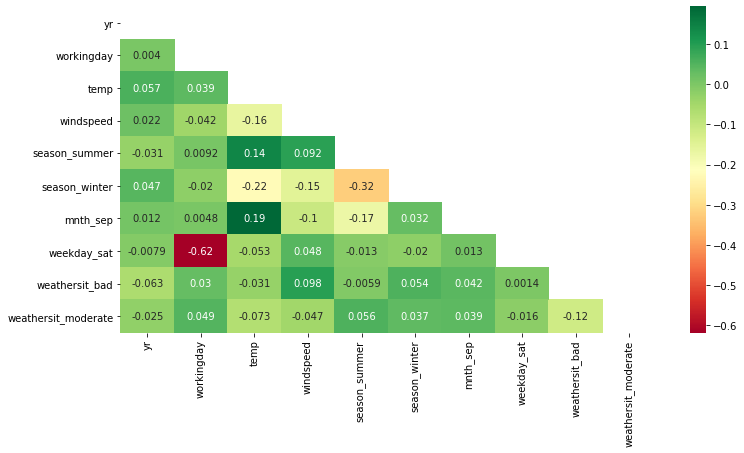

In [60]:
# Checking the correlations

plt.figure(figsize = (12,6))
matrix = np.triu(X_train_6.corr())
sns.heatmap(X_train_6.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

### Model-7

##### From Model-6, it is onberved that both p-values and VIFs are under control. But, on further checking, it is found that  "weekday_sat" and "workingday" are highly correlated, So, dropping one of them to avoid multicollinearity issue.

In [61]:
X_train_7 = X_train_6.drop(["weekday_sat"], axis = 1)

In [62]:
build_model(X_train_7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     251.9
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.26e-179
Time:                        17:57:40   Log-Likelihood:                 476.35
No. Observations:                 511   AIC:                            -932.7
Df Residuals:                     501   BIC:                            -890.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1129    

In [63]:
get_VIFS(X_train_7)

,Features,VIF
2,temp,4.39
3,windspeed,3.63
1,workingday,2.84
0,yr,1.99
4,season_summer,1.56
8,weathersit_moderate,1.51
5,season_winter,1.37
6,mnth_sep,1.19
7,weathersit_bad,1.07


### Model-8

##### From Model-7, P-value for "workingday" has increased, so dropping it. VIFs are under control

In [64]:
X_train_8 = X_train_7.drop(["workingday"], axis = 1)

In [65]:
build_model(X_train_8)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     281.8
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.28e-180
Time:                        17:57:40   Log-Likelihood:                 474.81
No. Observations:                 511   AIC:                            -931.6
Df Residuals:                     502   BIC:                            -893.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1236    

In [66]:
get_VIFS(X_train_8)

,Features,VIF
1,temp,3.86
2,windspeed,3.43
0,yr,1.99
3,season_summer,1.55
7,weathersit_moderate,1.48
4,season_winter,1.35
5,mnth_sep,1.19
6,weathersit_bad,1.07


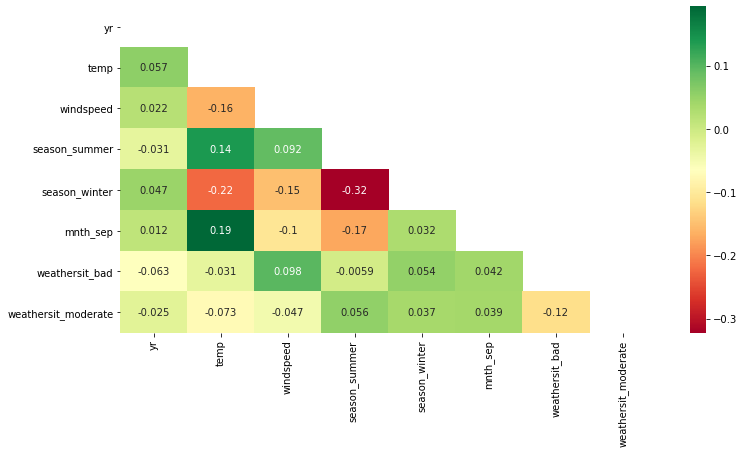

In [67]:
# Checking the correlations

plt.figure(figsize = (12,6))
matrix = np.triu(X_train_8.corr())
sns.heatmap(X_train_8.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

## Inference:
>**At this, stage, p-values and VIFs are all under their significant levels, and also their is not much multicollinearity in the model. Thus the model seems to be fit for further proccess of residual analysis and test set prediction**

## Step 7: Residual Analysis

In [68]:
# Add a constant
X_train_lm = sm.add_constant(X_train_8)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     281.8
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.28e-180
Time:                        17:57:40   Log-Likelihood:                 474.81
No. Observations:                 511   AIC:                            -931.6
Df Residuals:                     502   BIC:                            -893.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1236    

### 1. Linear Relationship Assumption

Linear regression needs the relationship between the independent and dependent variables to be linear. The CCPR plot provides a way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables.

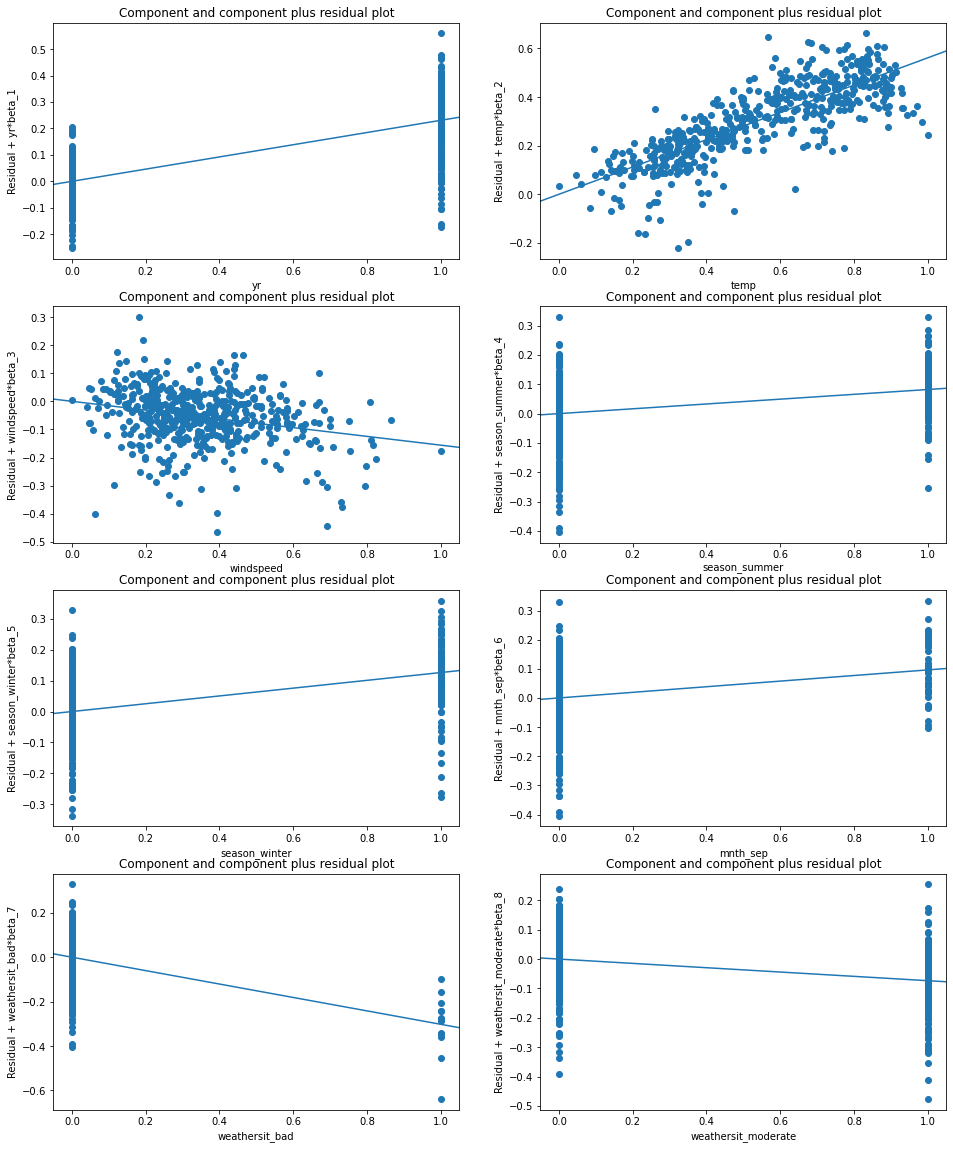

In [69]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16,20))
sm.graphics.plot_ccpr(lr, "yr", ax=ax1)
sm.graphics.plot_ccpr(lr, "temp", ax=ax2)
sm.graphics.plot_ccpr(lr, "windspeed", ax=ax3)
sm.graphics.plot_ccpr(lr, "season_summer", ax=ax4)
sm.graphics.plot_ccpr(lr, "season_winter", ax=ax5)
sm.graphics.plot_ccpr(lr, "mnth_sep", ax=ax6)
sm.graphics.plot_ccpr(lr, "weathersit_bad", ax=ax7)
sm.graphics.plot_ccpr(lr, "weathersit_moderate", ax=ax8)
plt.show()

### 2. Assumption of Normally Distributed Error Terms

Residuals or error terms as we know are the differences between the true value and the predicted value. This assumption tests that residuals should follow a normal distribution. Once the residuals from our model is obtained, this is relatively easy to test using either a histogram or a QQ Plot.

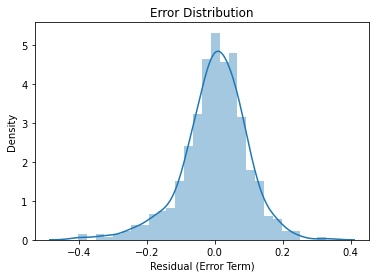

In [70]:
y_train_pred = lr.predict(X_train_lm)
residuals = y_train - y_train_pred
sns.distplot(residuals)
plt.xlabel('Residual (Error Term)')
plt.title('Error Distribution')
plt.show()

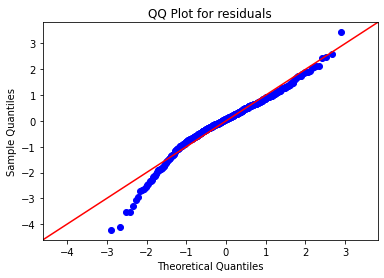

In [71]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.title('QQ Plot for residuals')
plt.show()

### 3. Assumption of Error Terms Being Independent (Autocorrelation check)

- Independence of residuals means "absence of auto-correlation"
- Autocorrelation here refers to the fact that observations’ errors are correlated
- To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. 
 The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables
 (0–2: positive auto-correlation, 2–4: negative auto-correlation)

In [72]:
print('The Durbin-Watson value for final Model is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for final Model is 2.0278


- There should not be autocorrelation in the data. So, also on plotting Residuals vs fitted values, the error terms should not form any pattern.¶

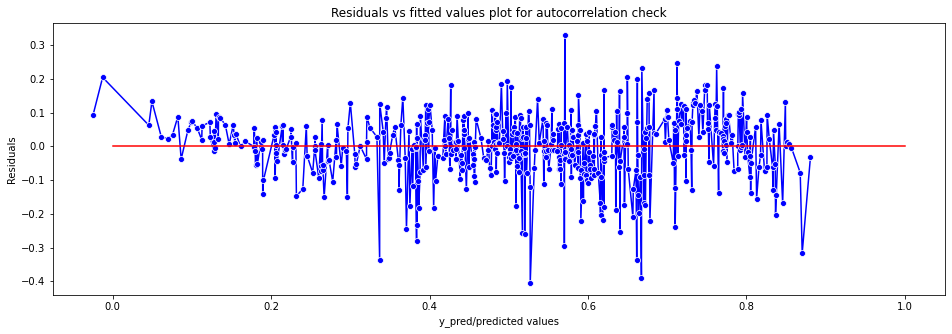

In [73]:
plt.figure(figsize=(16,5))
p = sns.lineplot(y_train_pred, residuals, marker='o', color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

### 4. Homoscedasticity

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.¶

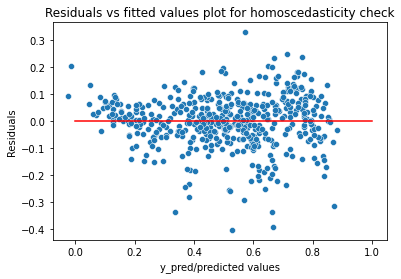

In [74]:
p = sns.scatterplot(y_train_pred, residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

**Goldfeld Quandt Test**

Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

- Null Hypothesis: Error terms are homoscedastic
- Alternative Hypothesis: Error terms are heteroscedastic.

In [75]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.2293168816942728), ('p-value', 0.06173211620657116)]

In Goldfeld Quandt Test, since p value is more than 0.05, we can't reject it's null hypothesis that error terms are homoscedastic. Seems good till now.

### 5. Little or no Multicollinearity

Multicollinearity is the phenomenon when a number of the explanatory variables are strongly correlated. So why do we want to have strong correlations between each independent variable and the dependent variable, but no correlation between independent variables? The reason is that if two independent variables are correlated, they explain the same information. The model will not be able to know which of the two variables is actually responsible for a change in the dependent variable. 

We can test for multicollinearity problems using the Variance Inflation Factor(VIF) or correlation matrix. VIF less than 5 are considered good, since it explains 80% of model effectively.

In [76]:
get_VIFS(X_train_8)

,Features,VIF
1,temp,3.86
2,windspeed,3.43
0,yr,1.99
3,season_summer,1.55
7,weathersit_moderate,1.48
4,season_winter,1.35
5,mnth_sep,1.19
6,weathersit_bad,1.07


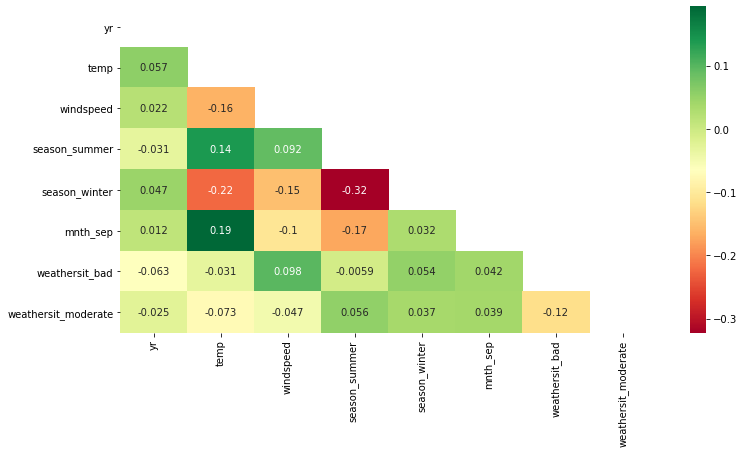

In [77]:
# Checking the correlations

plt.figure(figsize = (12,6))
matrix = np.triu(X_train_8.corr())
sns.heatmap(X_train_8.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

### 6.  Independent variables are uncorrelated with the error term 

It serves to check whether there is correlation between any of the independent variables and the error term. We are using scatterplots for this purpose.

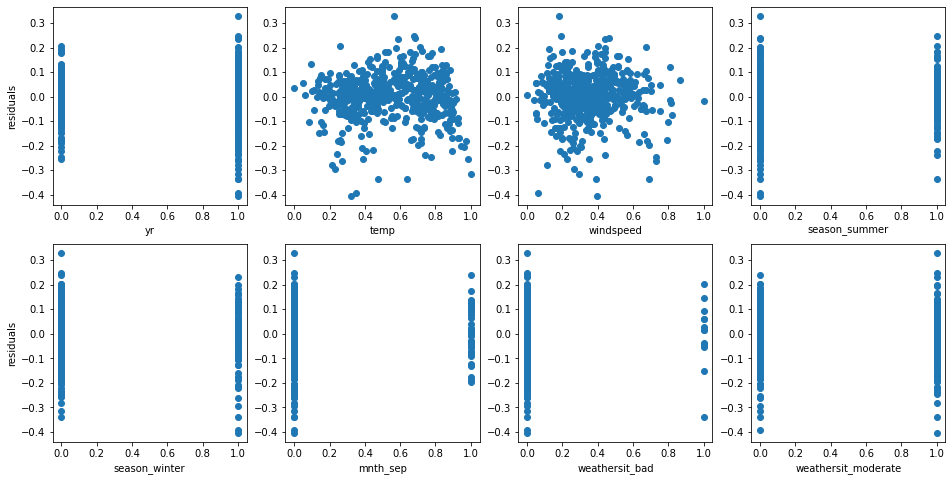

In [78]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(16,8))
ax1.scatter(X_train_lm['yr'], residuals)
ax1.set_xlabel('yr')
ax1.set_ylabel('residuals')

ax2.scatter(X_train_lm['temp'], residuals)
ax2.set_xlabel('temp')

ax3.scatter(X_train_lm['windspeed'], residuals)
ax3.set_xlabel('windspeed')

ax4.scatter(X_train_lm['season_summer'], residuals)
ax4.set_xlabel('season_summer')

ax5.scatter(X_train_lm['season_winter'], residuals)
ax5.set_xlabel('season_winter')
ax5.set_ylabel('residuals')

ax6.scatter(X_train_lm['mnth_sep'], residuals)
ax6.set_xlabel('mnth_sep')

ax7.scatter(X_train_lm['weathersit_bad'], residuals)
ax7.set_xlabel('weathersit_bad')

ax8.scatter(X_train_lm['weathersit_moderate'], residuals)
ax8.set_xlabel('weathersit_moderate')

plt.show()

### 7. Observations of the error term are uncorrelated with each other

This checks whether there is a correlation inside the observations of the error term. If this happens, then it means the  assumption: the observations are drawn randomly, is violated.

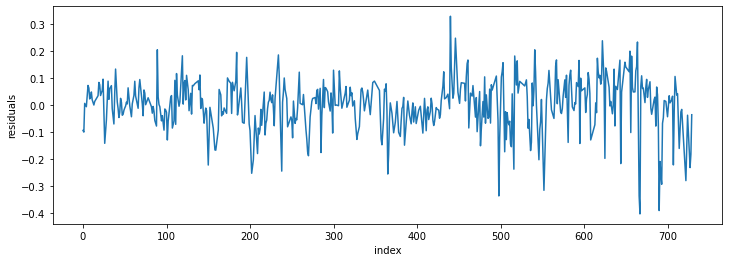

In [79]:
plt.figure(figsize = (12,4))
residuals2 = y_train - y_train_pred
residuals2 = residuals2.sort_index(axis=0)
plt.plot(residuals2.index, residuals2)
plt.xlabel('index')
plt.ylabel('residuals')
plt.show()

## Step 8: Making Predictions Using the Final Model

In [80]:
# Applying scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [81]:
# Creating target and feature variable for testset

y_test = df_test.pop('cnt')
X_test = df_test

In [82]:
#Selecting the variables that were part of final model.
col1=X_train_8.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                219 non-null    float64
 1   yr                   219 non-null    int64  
 2   temp                 219 non-null    float64
 3   windspeed            219 non-null    float64
 4   season_summer        219 non-null    uint8  
 5   season_winter        219 non-null    uint8  
 6   mnth_sep             219 non-null    uint8  
 7   weathersit_bad       219 non-null    uint8  
 8   weathersit_moderate  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(5)
memory usage: 9.6 KB


In [83]:
# Making predictions using the final model (lr6)

y_pred = lr.predict(X_test_lm)

In [84]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.80670800161213

## Step 9: Model Evaluation

In [85]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.80670800161213

##### Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

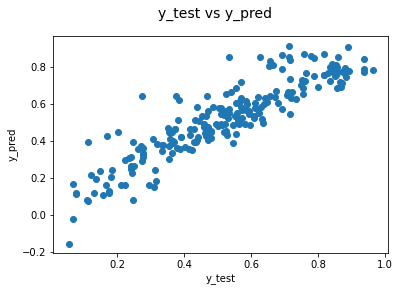

In [86]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 14) 
plt.xlabel('y_test')
plt.ylabel('y_pred') 

In [87]:
round(lr.params,4)

const                  0.1236
yr                     0.2307
temp                   0.5616
windspeed             -0.1561
season_summer          0.0822
season_winter          0.1264
mnth_sep               0.0963
weathersit_bad        -0.3023
weathersit_moderate   -0.0736
dtype: float64

We can see that the equation of our best fitted line is:

**$$cnt = 0.1236 + 0.2307 \times yr +  0.5616 \times temp - 0.1561 \times windspeed + 0.0822 \times season\_summer + 0.1264 \times season\_winter + 0.0963 \times mnth\_sep - 0.3023 \times weathersit\_bad - 0.0736 \times weathersit\_moderate $$**


In [88]:
r2 = r2_score(y_test, y_pred)

# Calculating Adjusted-R^2 value for the test dataset
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7993


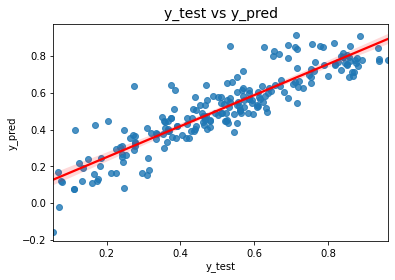

In [89]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, fit_reg=True, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=14)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

## Step 10: Conclusion

### Comparision between Train and Test dataset:
- Train dataset R-squared          : 0.818
- Test dataset R-squared           : 0.8067
- Train dataset Adjusted R-squared : 0.815    
- Test dataset Adjusted R-squared  : 0.7993

### Significant variables to predict the demand for shared bikes:

- yr (year)
- temp (temperature in Celsius)
- windspeed
- season_summer
- season_winter
- mnth_sep (September Month)
- weathersit_bad (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
- weather_moderate (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)